<a href="https://colab.research.google.com/github/yejikwon7/AI/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 라이브러리 불러오기

In [ ]:
import torch
import torch.nn as nn # wx: linear 연산으로 수
import torch.optim as optim
import torch.nn.init as init # 값 초기화

데이터 생성

In [ ]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1) # normal: 정규분포
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15) # 특성 1개 / -15~15 사이에 1000개 분포
y = (x**2) + 3
y_noise = y + noise

모델, 손실 함수, 최적화 함수 설정

In [ ]:
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트
# Sequential에 정의된 순서대로 연산 진행, 많은 연산 묶어서 한 번에 관리할 수 있어 편리

model = nn.Sequential(
          nn.Linear(1,6), # wx 연산 수행 -> input node, output node 개수 반드시 필요
          nn.ReLU(),
          nn.Linear(6,10),
          nn.ReLU(),
          nn.Linear(10,6),
          nn.ReLU(),
          nn.Linear(6,1),
          # 4층 신경망
)

loss_func = nn.L1Loss() # MAE
optimizer = optim.SGD(model.parameters(), lr=0.0002) # 확률적 경사하강법

모델의 학습

In [ ]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad() # 역전파 수행 시 값 제대로 넘어가기 위함
    output = model(x) # mini_batch=1000 / 1 iter = 1 epoch
    # output: 예측값

    loss = loss_func(output, y_noise) # y_noise: 정답값
    loss.backward() # 역전파: 기울기 계산
    optimizer.step() # 가중치 갱신

    loss_array.append(loss.item()) # epoch돌 때마다의 loss

손실 그래프

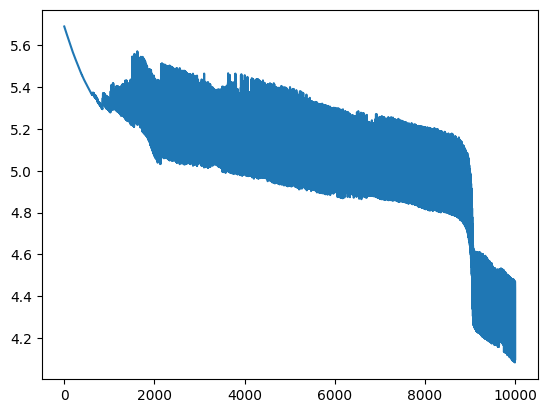

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

학습된 모델의 결과값과 실제 목표값의 비교

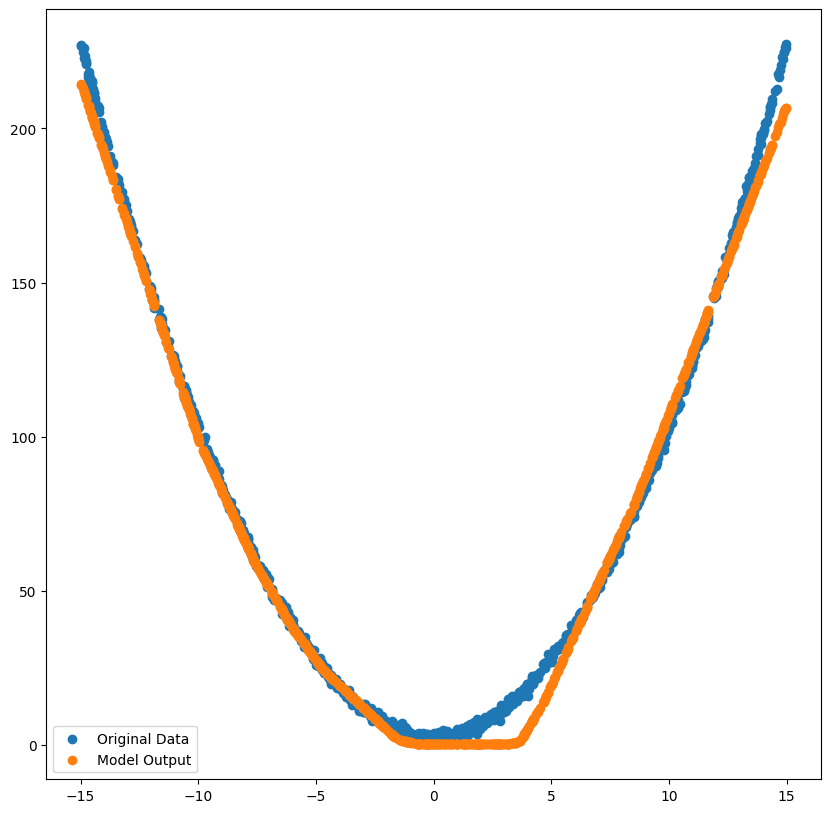

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x.detach().numpy(), y_noise, label="Original Data") # 정답값
plt.scatter(x.detach().numpy(), output.detach().numpy(), label="Model Output") # 예측결과
plt.legend()
plt.show()